In [9]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import numpy as np
import astropy.constants as c
import astropy.units as u

CUSTOM_PLOT_STYLE = {
    "text.usetex": True,

    "font.family": "serif",
    "font.size": 16,

    # Set some default sizes, so we don't need to include them in each call
    "lines.markersize": 1.5,
    "lines.linewidth": 1.5,
    # "errorbar.capsize": 3,

    # Set savefig to use bbox_inches="tight" by default
    "savefig.bbox": "tight",
    "savefig.facecolor": "none",
    "savefig.dpi": 300,

    # Higher DPI for sharper inline images
    "figure.dpi": 96
}

matplotlib.rcdefaults()
matplotlib.rcParams.update(CUSTOM_PLOT_STYLE)

In [10]:
seds_EH = np.genfromtxt('SEDs_Hammerstein2023.txt')
time_EH = np.genfromtxt('time_SEDs_Hammerstein2023.txt')

seds_mosfit = np.genfromtxt('SEDs_mosfit.txt')
time_mosfit= np.genfromtxt('time_SEDs_mosfit.txt')

frequency = np.genfromtxt('frequency.txt')

In [11]:
tmin =  time_mosfit[0]
tmax = time_mosfit[-1]

colormap = cm.get_cmap('Spectral_r')
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=tmin,vmax=tmax))
sm.set_array([]) 

/tmp/ipykernel_133480/2987298511.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('Spectral_r')


/tmp/ipykernel_133480/617279301.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


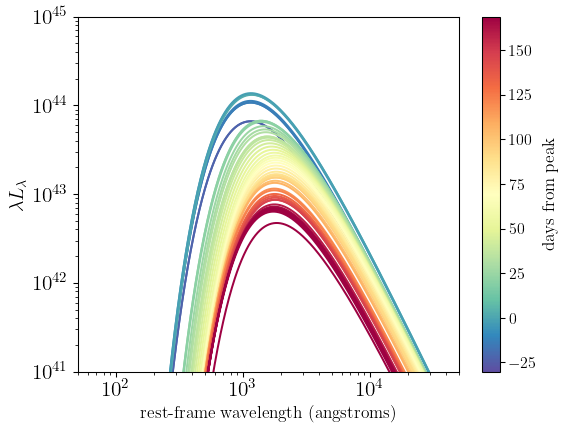

In [12]:
for lnui, lnu in enumerate(seds_EH):
    plt.plot(c.c.cgs.value/frequency * 1e8, 
             frequency*lnu, color = sm.to_rgba(time_EH[lnui]))
    
    

plt.yscale('log')
plt.xscale('log')

plt.xlabel('rest-frame wavelength (angstroms)', fontsize = 13)
plt.ylabel('$\\lambda L_\\lambda$', fontsize = 15)

plt.ylim(1e41, 1e45)
plt.xlim(50, 5e4)

cbar = plt.colorbar(sm)
plt.setp(cbar.ax.get_yticklabels(), fontsize = 12)
cbar.set_label('days from peak', fontsize = 13) 

plt.show()

/tmp/ipykernel_133480/3590127241.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


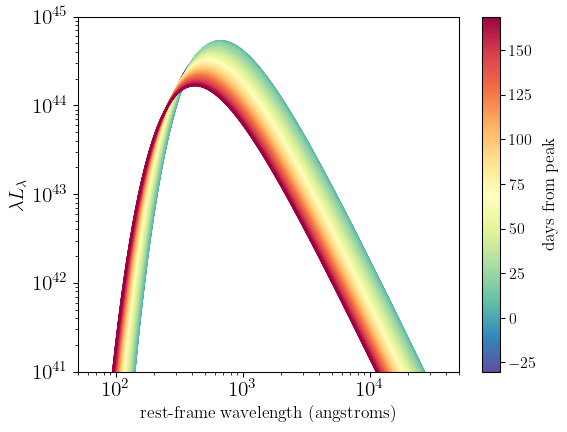

In [13]:
for lnui, lnu in enumerate(seds_mosfit):
    plt.plot(c.c.cgs.value/frequency * 1e8, frequency*lnu,
             color = sm.to_rgba(time_mosfit[lnui]))
    
    

plt.yscale('log')
plt.xscale('log')

plt.xlabel('rest-frame wavelength (angstroms)', fontsize = 13)
plt.ylabel('$\\lambda L_\\lambda$', fontsize = 15)

plt.ylim(1e41, 1e45)
plt.xlim(50, 5e4)

cbar = plt.colorbar(sm)
plt.setp(cbar.ax.get_yticklabels(), fontsize = 12)
cbar.set_label('days from peak', fontsize = 13) 

plt.show()